# Definitions 

amount_tsh - Total static head (amount water available to waterpoint)

date_recorded - The date the row was entered

funder - Who funded the well

gps_height - Altitude of the well

installer - Organization that installed the well

longitude - GPS coordinate 

latitude - GPS coordinate

wpt_name - Name of the waterpoint if there is one

num_private - 

basin - Geographic water basin

subvillage - Geographic location

region - Geographic location

region_code - Geographic location (coded)

district_code - Geographic location (coded)

lga - Geographic location

ward - Geographic location

population - Population around the well

public_meeting - True/False

recorded_by - Group entering this row of data

scheme_management - Who operates the waterpoint

scheme_name - Who operates the waterpoint

permit - If the waterpoint is permitted

construction_year - Year the waterpoint was constructed

extraction_type - The kind of extraction the waterpoint uses

extraction_type_group - The kind of extraction the waterpoint uses

extraction_type_class - The kind of extraction the waterpoint uses

management - How the waterpoint is managed

management_group - How the waterpoint is managed

payment - What the water costs

payment_type - What the water costs

water_quality - The quality of the water

quality_group - The quality of the water

quantity - The quantity of water

quantity_group - The quantity of water

source - The source of the water

source_type - The source of the water

source_class - The source of the water

waterpoint_type - The kind of waterpoint

waterpoint_type_group - The kind of waterpoint

# Package Installation

In [1]:
import pandas as pd
import pandas as np
import geopandas as geo
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
from IPython.display import Image  
from pydotplus import graph_from_dot_data
from IPython.display import display
from sklearn.model_selection import GridSearchCV


The labels in this dataset are simple. There are three possible values:
functional - the waterpoint is operational and there are no repairs needed
functional needs repair - the waterpoint is operational, but needs repairs
non functional - the waterpoint is not operational

# Dataset

In [2]:
X = pd.read_csv('Data/X.csv')
y = pd.read_csv('Data/Y.csv')
X1 = pd.read_csv('Data/X1.csv')

df = pd.merge(y,X,on='id')

In [3]:
X.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group'],
      dtype='object')

In [4]:
import geopandas as gpd
import descartes
from shapely.geometry import Point,Polygon
import matplotlib.pyplot as plt

map_tz = gpd.read_file('MAP/TAN-level_1.shp')


crs = {'init' : 'espg:4326'}
map_tz

,AREA,PERIMETER,ID,CAPTION,geometry
0,None,0.0,Arusha,Arusha,"POLYGON ((36.79663 -3.62132, 36.79404 -3.64103..."
1,None,0.0,Dar-Es-Salaam,Dar-Es-Salaam,"POLYGON ((39.17244 -6.61520, 39.17511 -6.61943..."
2,None,0.0,Dar-Es-Salaam,None,"POLYGON ((39.27123 -6.70284, 39.25895 -6.69190..."
3,None,0.0,Dar-Es-Salaam,None,"POLYGON ((39.25245 -6.65540, 39.24807 -6.65382..."
4,None,0.0,Dar-Es-Salaam,None,"POLYGON ((39.93057 -6.90792, 39.92870 -6.90733..."
...,...,...,...,...,...
78,None,0.0,Tanga,Tanga,"POLYGON ((38.66664 -5.90183, 38.51538 -5.82800..."
79,None,0.0,Tanga,None,"POLYGON ((39.16838 -5.12499, 39.16332 -5.12457..."
80,None,0.0,Tanga,None,"POLYGON ((39.13406 -5.20494, 39.14293 -5.19247..."
81,None,0.0,Tanga,None,"POLYGON ((39.16567 -5.01479, 39.16336 -5.01343..."


In [5]:
well_points = X[['longitude', 'latitude']].apply(lambda row:
              Point(row["longitude"], row["latitude"]), axis=1)
geo_wells = gpd.GeoDataFrame({"geometry": well_points})

In [6]:
geo_wells

,geometry
0,POINT (34.93809 -9.85632)
1,POINT (34.69877 -2.14747)
2,POINT (37.46066 -3.82133)
3,POINT (38.48616 -11.15530)
4,POINT (31.13085 -1.82536)
...,...
59395,POINT (37.16981 -3.25385)
59396,POINT (35.24999 -9.07063)
59397,POINT (34.01709 -8.75043)
59398,POINT (35.86132 -6.37857)


In [7]:
map_tz.crs = {'init': 'epsg:4326'}
geo_wells.crs = {'init': 'epsg:4326'}

Text(0.5, 1, 'Wells')

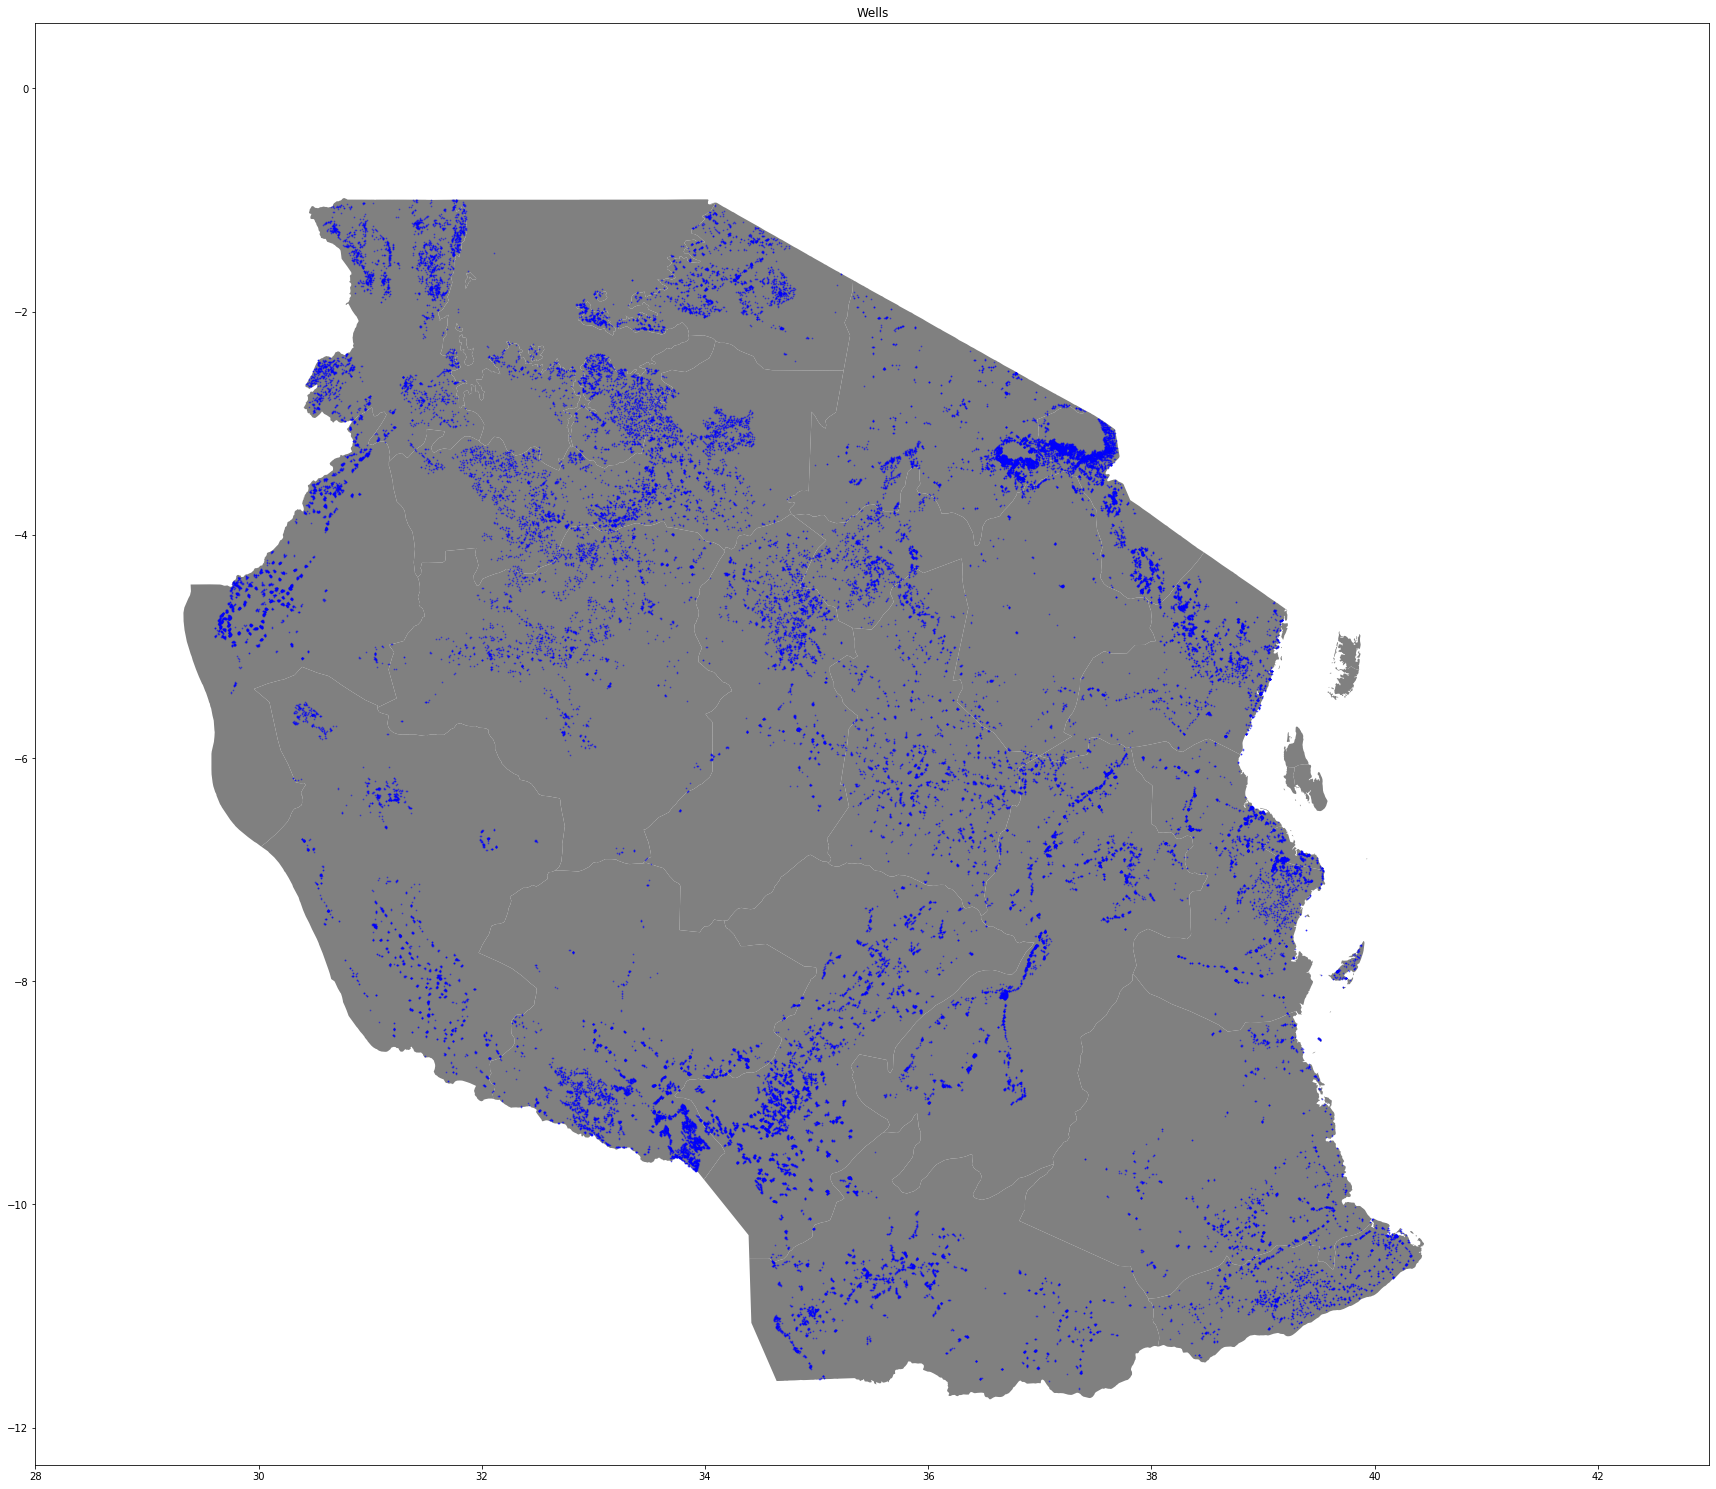

In [8]:
fig, ax = plt.subplots(1, figsize=(30,30))
base = map_tz.plot(ax=ax, color='gray')
geo_wells.plot(ax=base, marker="o",color='blue',  markersize=0.5, alpha=0.5)
plt.xlim(28,43)
# _ = ax.axis('off')
ax.set_title("Wells")

In [26]:
map_water = gpd.read_file('Waterbodies/Waterbodies.shp')
map_water.crs = {'init': 'epsg:4326'}


Text(0.5, 1, 'Wells')

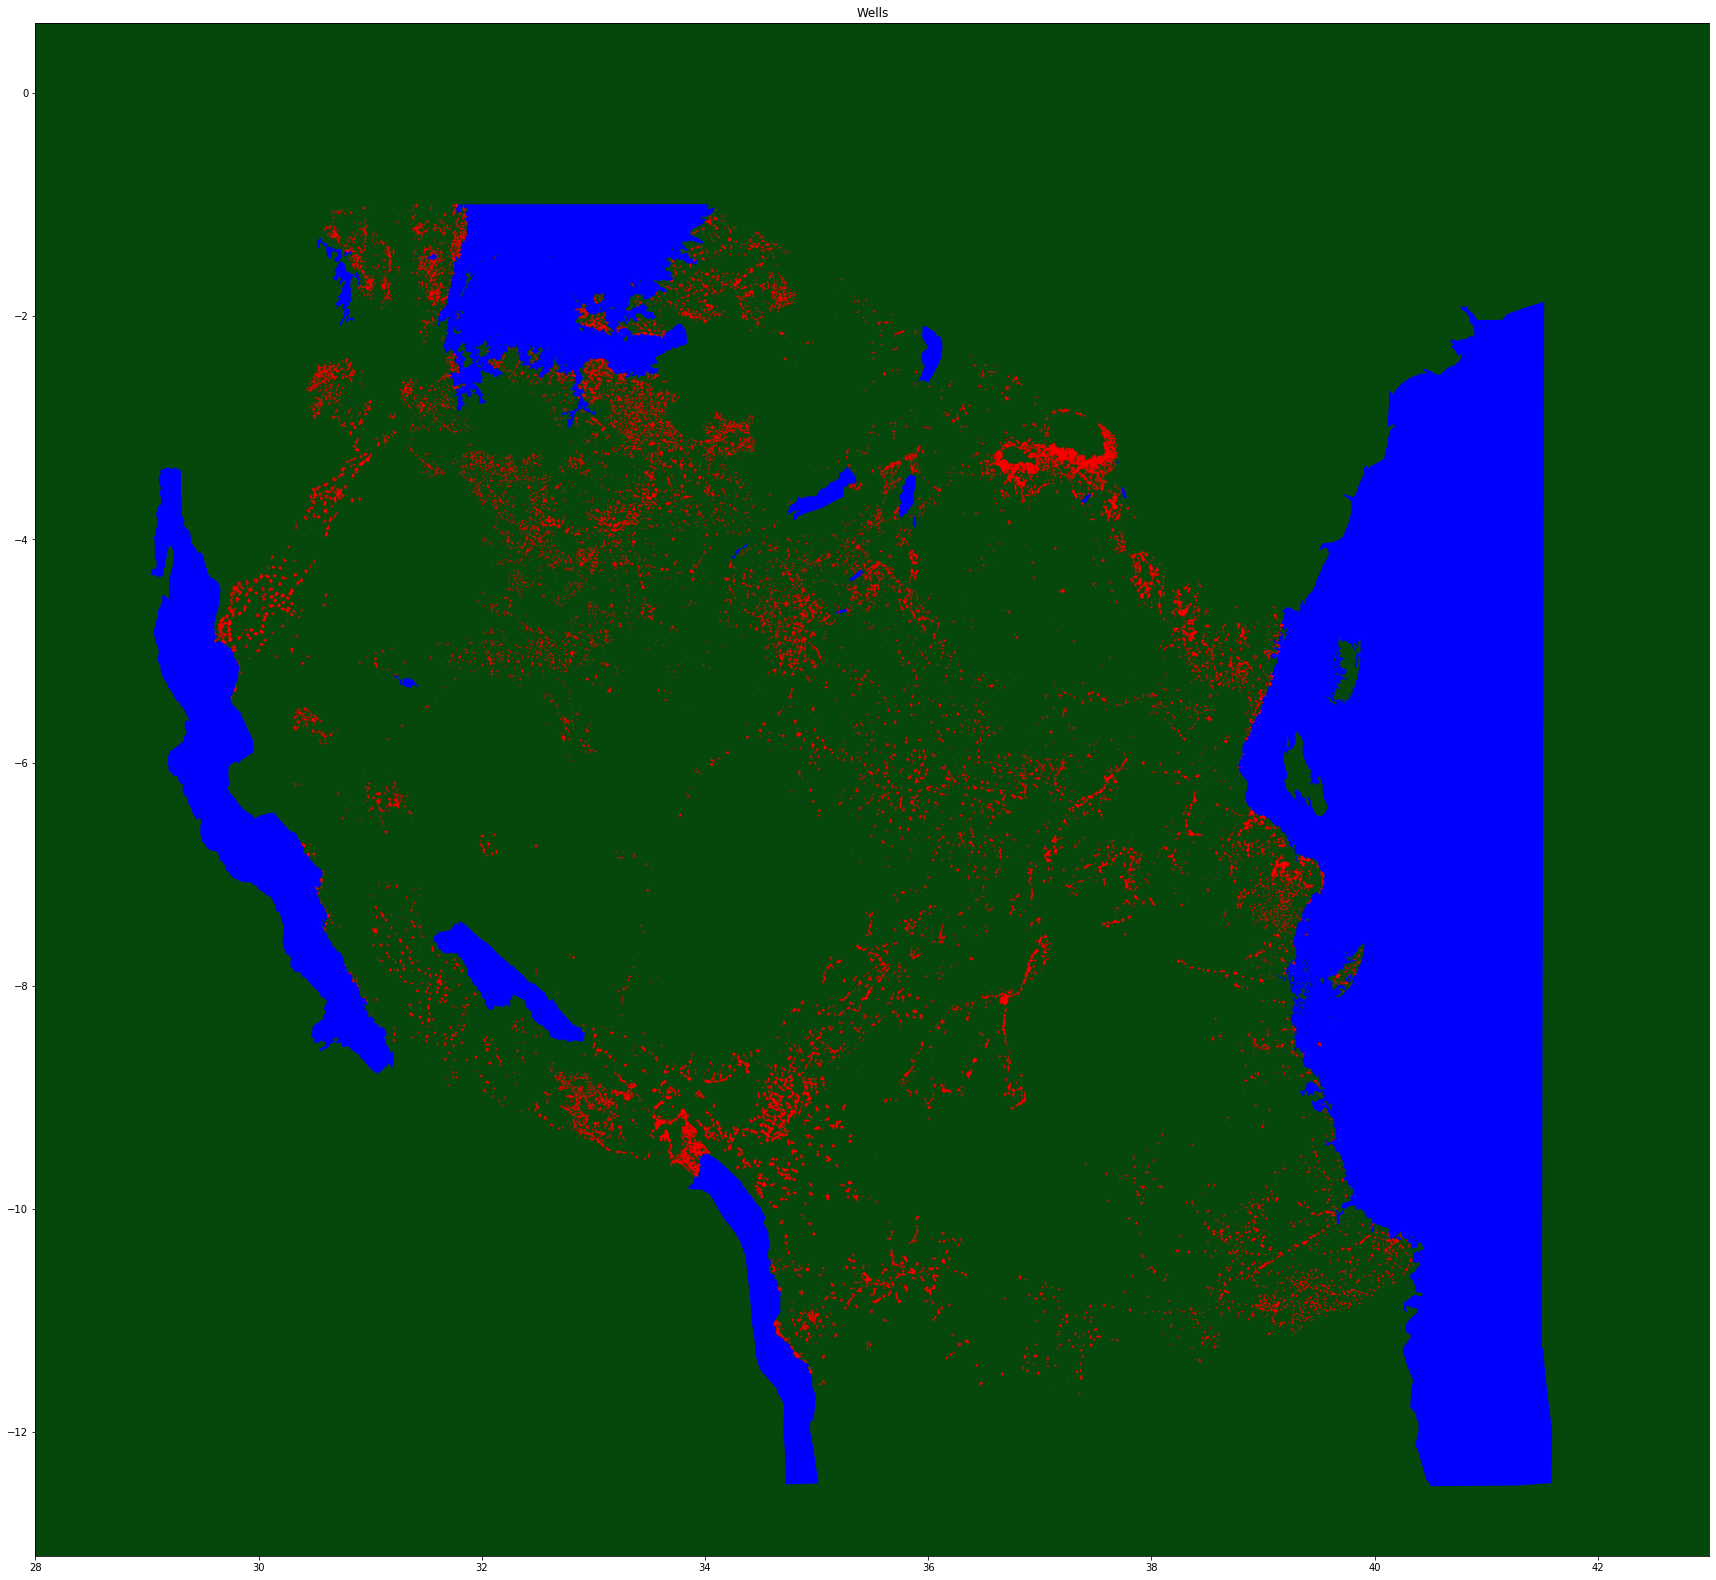

In [32]:
fig, ax = plt.subplots(1, figsize=(30,30))
base = map_water.plot(ax=ax, color='blue')
geo_wells.plot(ax=base, marker="o",color='red',  markersize=0.5, alpha=0.5)
plt.xlim(28,43)
ax.set_facecolor('xkcd:forest green')
# _ = ax.axis('off')
ax.set_title("Wells")

In [9]:
df.head()

,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,functional,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,functional,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,functional,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,non functional,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,functional,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [10]:
non_func = df[df['status_group'] == 'non functional']
non_func['funder'].value_counts()

Government Of Tanzania    4663
Danida                    1242
Hesawa                    1034
World Bank                 707
Kkkt                       498
                          ... 
Icdp                         1
Soliderm                     1
Mitema                       1
Fpct                         1
Mtewe                        1
Name: funder, Length: 1019, dtype: int64

In [11]:
df['funder'].value_counts()

Government Of Tanzania          9084
Danida                          3114
Hesawa                          2202
Rwssp                           1374
World Bank                      1349
                                ... 
Godii                              1
Rotary Club Of Usa And Moshi       1
Tree Ways German                   1
World Vision/rc Church             1
Iom                                1
Name: funder, Length: 1897, dtype: int64

In [12]:
df.isnull().sum()

id                           0
status_group                 0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_qu

In [13]:
df['installer'].fillna('other', inplace = True)
df['funder'].fillna('other', inplace = True)
df['public_meeting'].fillna('False', inplace = True)
df['scheme_management'].fillna('other',inplace = True)
df['permit'].fillna('False', inplace = True)
df['scheme_name'].fillna('other', inplace = True)
df.dropna(subset=['subvillage'],inplace = True)
df.drop(columns =['recorded_by','construction_year'], inplace = True)

In [14]:
df.isnull().sum()

id                       0
status_group             0
amount_tsh               0
date_recorded            0
funder                   0
gps_height               0
installer                0
longitude                0
latitude                 0
wpt_name                 0
num_private              0
basin                    0
subvillage               0
region                   0
region_code              0
district_code            0
lga                      0
ward                     0
population               0
public_meeting           0
scheme_management        0
scheme_name              0
permit                   0
extraction_type          0
extraction_type_group    0
extraction_type_class    0
management               0
management_group         0
payment                  0
payment_type             0
water_quality            0
quality_group            0
quantity                 0
quantity_group           0
source                   0
source_type              0
source_class             0
w

In [15]:
df.sample(n=20)

,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
48445,7725,functional,300.0,2011-03-13,Government Of Tanzania,2139,Commu,34.006630,-9.316767e+00,none,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
42853,69601,functional needs repair,0.0,2011-07-08,Kkkt,0,KKKT,33.034538,-9.231860e+00,Wilson Simbeye,...,on failure,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump
47473,43804,non functional,0.0,2013-03-25,Government Of Tanzania,1554,DWE,37.510483,-3.269901e+00,Kwa Raymond Mamuya,...,never pay,soft,good,enough,enough,spring,spring,groundwater,other,other
12203,33518,non functional,200.0,2011-08-03,Co,755,DWE,30.523711,-7.127764e+00,Shuleni,...,on failure,soft,good,enough,enough,shallow well,shallow well,groundwater,other,other
30179,28291,non functional,0.0,2012-10-23,Government Of Tanzania,1375,Government,33.998459,-1.807446e+00,Kwa Orambo,...,unknown,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3623,68621,functional,0.0,2013-01-27,other,1617,other,34.860413,-4.965506e+00,Makiungu & Muyanji,...,never pay,soft,good,insufficient,insufficient,machine dbh,borehole,groundwater,communal standpipe,communal standpipe
5771,4481,functional,0.0,2011-03-14,Mkinga Distric Coun,0,DWE,39.102083,-4.677982e+00,Police Tank,...,never pay,coloured,colored,insufficient,insufficient,dam,dam,surface,other,other
55075,14563,functional needs repair,0.0,2011-03-16,Tardo,1812,Tardo,38.271203,-4.648330e+00,Kwa Mzee Michael Hemedi,...,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
112,10784,functional,0.0,2011-07-17,Tulawaka Gold Mine,0,Tulawaka Gold Mine,31.489047,-3.267904e+00,Imalanota,...,never pay,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump
20438,40517,non functional,0.0,2011-08-02,Hesawa,0,Hesawa,0.000000,-2.000000e-08,Nyanza,...,unknown,unknown,unknown,dry,dry,shallow well,shallow well,groundwater,other,other


In [16]:
df.district_code.value_counts()

1     12193
2     11173
3      9637
4      8999
5      4356
6      4074
7      3343
8      1043
30      995
33      874
53      745
43      505
13      391
23      293
63      195
62      109
60       63
0        23
80       12
67        6
Name: district_code, dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59029 entries, 0 to 59399
Data columns (total 39 columns):
id                       59029 non-null int64
status_group             59029 non-null object
amount_tsh               59029 non-null float64
date_recorded            59029 non-null object
funder                   59029 non-null object
gps_height               59029 non-null int64
installer                59029 non-null object
longitude                59029 non-null float64
latitude                 59029 non-null float64
wpt_name                 59029 non-null object
num_private              59029 non-null int64
basin                    59029 non-null object
subvillage               59029 non-null object
region                   59029 non-null object
region_code              59029 non-null int64
district_code            59029 non-null int64
lga                      59029 non-null object
ward                     59029 non-null object
population               59029 non-null int64
p

# Initial split of DataSet (Train / Test set)

In [18]:
y = df['status_group']
X = df.loc[:, ['installer', 'payment_type', 'water_quality', 'source_class', 'waterpoint_type']] # Confirm the number of independent variables
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size=0.67)


# Baseline Model - Decision Tree

In [19]:
X_ohe = pd.get_dummies(X_train, prefix = ['installer','payment_type', 'water_quality',  'source_class','waterpoint_type'])
y_ohe = pd.get_dummies(y_train, prefix = ['status_group'])

In [20]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth = 100, min_samples_leaf = 500)
clf.fit(X_ohe, y_ohe)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=100, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=500, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [21]:
# y_preds = clf.predict(X_ohe)
# print('Accuracy: ', accuracy_score(y_ohe, y_preds))

In [22]:
# clf = DecisionTreeClassifier(criterion='entropy', max_depth = 5, min_samples_leaf = 200)
# clf.fit(X_ohe, y_ohe) #encoded categorical variable using pd.get_dummies()

# from sklearn.tree import export_graphviz
# # Export as dot file
# export_graphviz(clf, out_file='tree.dot', 
#                 feature_names = X_ohe.columns,
#                 class_names = np.unique(y).astype(str),
#                 rounded = True, proportion = False, 
#                 precision = 2, filled = True)

# # Convert to png 
# from subprocess import call
# call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# # Display in jupyter notebook
# from IPython.display import Image
# Image(filename = 'tree.png')

In [23]:
# clf1 = DecisionTreeClassifier()
# param_grid = {'criterion':['gini','entropy'], 'max_depth': [5,10,15,20,50], 'min_samples_leaf':[100, 200, 300, 400]}
# gs = GridSearchCV(clf1, param_grid, cv = 5)

# gs.fit(X_ohe, y_ohe)
# gs.best_params_